In [37]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [38]:
#Create Pandas Dataframe from the dataset
data = pd.read_csv('Diabetes.csv')

In [39]:
#Preview the data
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [40]:
# Look at the number of rows and columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   763 non-null    float64
 2   BloodPressure             733 non-null    float64
 3   SkinThickness             541 non-null    float64
 4   Insulin                   394 non-null    float64
 5   BMI                       757 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


<Axes: >

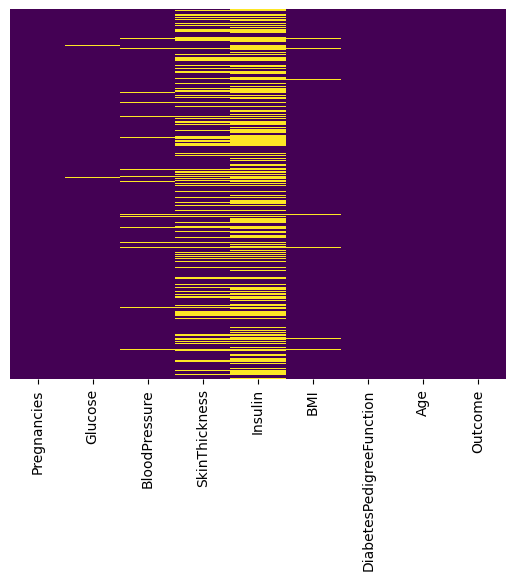

In [41]:
#Check for Null Values in Columns
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [47]:
#Find sum of null values in each column
data.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [48]:
#Find mean of values in each column
data.mean()

Pregnancies                   3.845052
Glucose                     121.686763
BloodPressure                72.405184
SkinThickness                29.153420
Insulin                     155.548223
BMI                          32.457464
DiabetesPedigreeFunction      0.471876
Age                          33.240885
Outcome                       0.348958
dtype: float64

Replacing missing values in each column with "mean" value for that column

In [51]:
data['Glucose'].fillna(value=121.686763, inplace=True)
data['BloodPressure'].fillna(value=72.405184, inplace=True)
data['SkinThickness'].fillna(value=29.153420, inplace=True)
data['Insulin'].fillna(value=155.548223, inplace=True)
data['BMI'].fillna(value=32.457464, inplace=True)

<Axes: >

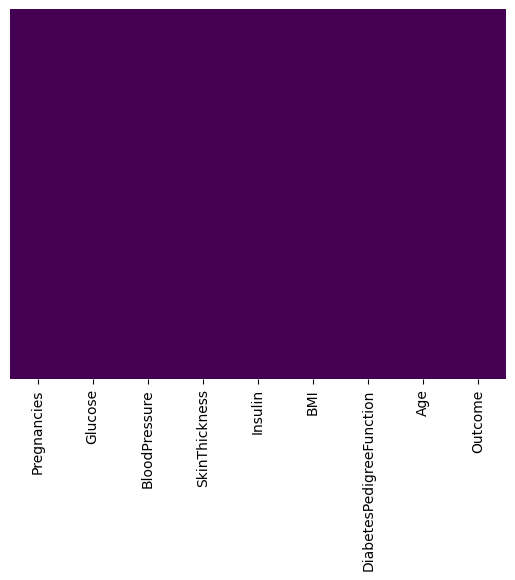

In [52]:
#Check again for Null Values in Columns to ensure missing values have been updated
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

Time to build the Logistic Regression Model! 
Logistic regression was choosen as we are predicting a categorical outcome (prediction of Diabetes (Yes or No) and we needed a classifcation technique. 

In [54]:
#Splitting the data into training and test data
from sklearn.model_selection import train_test_split

In [56]:
X_train, X_test, Y_train, Y_test = train_test_split(data.drop('Outcome',axis=1), 
                                                    data['Outcome'], test_size=0.30, 
                                                    random_state=101)

In [57]:
#Train the Model
from sklearn.linear_model import LogisticRegression

In [60]:
model = LogisticRegression()
model.fit(X_train,Y_train)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [61]:
predictions = model.predict(X_test)

In [63]:
#Evaluate the Model
from sklearn.metrics import classification_report

In [67]:
print(classification_report(Y_test,predictions))

              precision    recall  f1-score   support

           0       0.80      0.88      0.84       150
           1       0.72      0.58      0.64        81

    accuracy                           0.77       231
   macro avg       0.76      0.73      0.74       231
weighted avg       0.77      0.77      0.77       231



When evaluating a model it's important to look into Precision and Recall. As I like to simplify it, when a model is evaluated on precision, a higher precision is representative of a lower number of FALSE POSITIVES being identified by the model. Whereas higher recall is indicative of a lower number of FALSE NEGATIVES. 

As in this case, where the model is trying to diagnose a chronic illness (diabetes) FALSE NEGATIVES are a lot more harmful than FALSE POSITIVES so we need to look into recall. Recall of 0.58 would suggest that improvements need to be made to improve the model.

Ways to Improve Recall:
- Use different Machine Learning model ie: Decision Trees as these models tend to skew to higher recall
- Utilize feature selection, could have excluded the "Insulin" & "SkinThickness" columns to reduce noise for thre model
- Collect additional data points, as the dataset appears to be imbalanced with 150 True Negatives and 81 True Positives with regards to classifying whether a patient has diabetes or not